<a href="https://colab.research.google.com/github/mardgeer101/Colab-Notebooks/blob/main/09_implementing_regression_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [3]:
used_cars = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/usedcars.csv")
used_cars

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


In [4]:
ct = make_column_transformer(
    (MinMaxScaler(),["year","mileage"]),
    (OneHotEncoder(handle_unknown='ignore'),["model","color","transmission"])
)

In [8]:
X = used_cars.drop("price",axis=1)
y = used_cars["price"]

X.shape, y.shape

((150, 5), (150,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape, X_train.head()

((127, 5),
 (23, 5),
      year model  mileage   color transmission
 128  2007   SES    80605     Red         AUTO
 131  2006    SE    71331   White         AUTO
 145  2006   SES    95000  Silver         AUTO
 108  2008   SES    57341     Red         AUTO
 143  2004   SES   101130    Gray         AUTO)

In [11]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['year', 'mileage']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['model', 'color', 'transmission'])])

In [16]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal

array([[0.58333333, 0.516588  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.45333261, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.61477232, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.91666667, 0.0716176 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75      , 0.18191553, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75      , 0.21319537, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [190]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.007),
              metrics = ["mae"])

history = model.fit(X_train_normal, y_train, epochs=1000, batch_size=8, callbacks=[callback], verbose=1)

Epoch 1/1000
16/16 [==============================] - 2s 4ms/step - loss: 12867.6982 - mae: 12867.6982
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 12805.4121 - mae: 12805.4121
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 12538.7129 - mae: 12538.7129
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 11899.0215 - mae: 11899.0215
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 10579.8281 - mae: 10579.8281
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 8350.9863 - mae: 8350.9863
Epoch 7/1000
16/16 [==============================] - 0s 4ms/step - loss: 5502.8755 - mae: 5502.8755
Epoch 8/1000
16/16 [==============================] - 0s 4ms/step - loss: 4262.7935 - mae: 4262.7935
Epoch 9/1000
16/16 [==============================] - 0s 4ms/step - loss: 3116.1479 - mae: 3116.1479
Epoch 10/1000
16/16 [==============================] - 0s 4ms/step - loss: 3359.8

In [191]:
model.evaluate(X_test_normal,y_test)

1/1 [==============================] - 0s 113ms/step - loss: 2432.3967 - mae: 2432.3967


[2432.396728515625, 2432.396728515625]

Text(0.5, 0, 'epochs')

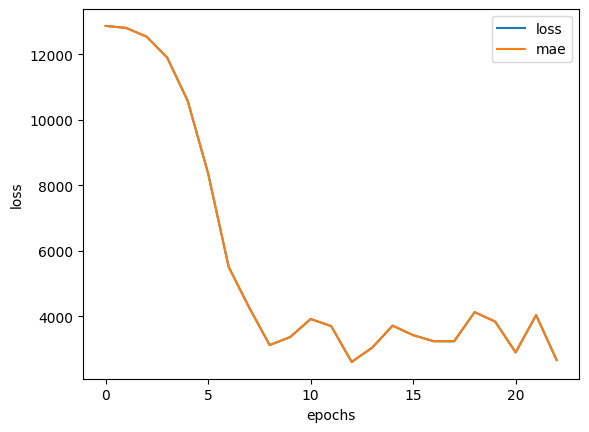

In [192]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [193]:
y_pred = model.predict(X_test_normal)
y_pred = tf.squeeze(y_pred)
y_pred

1/1 [==============================] - 0s 60ms/step


<tf.Tensor: shape=(23,), dtype=float32, numpy=
array([11986.531 , 15144.768 ,  6667.9644, 11832.587 ,  9298.127 ,
       11843.185 , 12067.22  ,  8445.543 , 10944.444 ,  9697.235 ,
        9398.24  , 13561.417 , 13117.299 , 10819.202 , 13151.368 ,
       12972.351 ,  9570.274 , 11399.804 , 12242.776 ,  8094.872 ,
       11672.546 ,  9207.513 , 12762.697 ], dtype=float32)>

In [84]:
y_test = tf.constant(y_test)
y_test = tf.cast(y_test,tf.float32)
y_test

<tf.Tensor: shape=(23,), dtype=float32, numpy=
array([13663., 15992., 10815., 13383., 13425., 14995., 13950.,  6995.,
       13888., 12997., 11450., 16950., 14989., 16995., 15992., 13995.,
       11984., 13845., 13995.,  8495., 14999.,  9651., 15499.],
      dtype=float32)>

In [194]:
y_test - y_pred

<tf.Tensor: shape=(23,), dtype=float32, numpy=
array([ 1676.4688 ,   847.2324 ,  4147.0356 ,  1550.4131 ,  4126.873  ,
        3151.8154 ,  1882.7803 , -1450.543  ,  2943.5557 ,  3299.7646 ,
        2051.7598 ,  3388.583  ,  1871.7012 ,  6175.798  ,  2840.6318 ,
        1022.6494 ,  2413.7256 ,  2445.1963 ,  1752.2236 ,   400.12793,
        3326.454  ,   443.4873 ,  2736.3027 ], dtype=float32)>